In [ ]:
'''
Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com


Problema sugerido
Considere os dados populacionais de altura da população adulta de uma determinada cidade (Arquivo 30.xlsx) e também o 
experimento que consiste em selecionar uma amostra aleatória de tamanho n.

No exercício anterior (Ex_4_1), vimos que:
- Para um tamanho de amostra igual a 35 (n=35) a probabilidade de obtermos uma altura média entre 1.69 e 1.71 metro é de 67,45%.
  
a) Utilizando os dados populacionais do "Arquivo 30.xls", selecione 10 mil amostras de tamanho 35.
   Destas 10 mil amostras, qual a porcentagem que você espera estar entre 1.69 e 1.71 metro?
   Realize uma simulação para ver qual a porcentagem das 10 mil amostras apresentam média entre 1.69 e 1.71.  
 
b) Agora considere o experimento de selecionar uma amostra de 80 pessoas
   Qual é a probabilidade de que a altura média das 80 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metro?

c) Repita a simulação do item a com amostras de tamanho 80.

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dados_populacionais = pd.read_excel('Arquivo 30.xlsx')

In [3]:
# Media populacional
dados_populacionais.mean()

altura_metros    1.700076
dtype: float64

In [4]:
# Desvio Padrão Populacional
dados_populacionais.std(ddof=0)

altura_metros    0.060169
dtype: float64

#### a) Utilizando os dados populacionais do "Arquivo 30.xls", selecione 10 mil amostras de tamanho 35.
#### Destas 10 mil amostras, qual a porcentagem que você espera estar entre 1.69 e 1.71 metros?
#### Realize uma simulação para ver qual a porcentagem das 10 mil amostras apresentam média entre 1.69 e 1.71.  

In [ ]:
'''
Para um tamanho de amostra igual a 35 (n=35) a probabilidade de obtermos uma altura média entre 1.69 e 1.71 metros é de 67,45%.
Assim, destas 10 mil amostras, podemos esperar que (aproximadamente) 67,45% estejam entre 1.69 e 1.71.
'''

In [ ]:
# Simulações abaixo

In [5]:
# Gera 10 mil amostras diferentes de tamanho 35
q = 10_000     # número de amostras diferentes a serem geradas
n = 35          # tamanho das amostras
amostras_35 = list()

while len(amostras_35) < q:
    amostra = set(np.random.choice(dados_populacionais.index, size=n, replace=False))
    if amostra not in amostras_35:
        amostras_35.append(amostra)

In [6]:
# Calcula a média para cada uma das 10 mil amostras que obtivemos de tamanho 35
medias_amostras_35 = list()
for amostra in amostras_35:
    alturas_amostra = dados_populacionais.loc[amostra]
    media_alturas = alturas_amostra.mean()
    medias_amostras_35.append(float(media_alturas))

In [7]:
# Calcula a porcentagem de amostras dentro do intervalo [1.69 e 1.71]
x_barra_1 = 1.69
x_barra_2 = 1.71

df_medias = pd.Series(medias_amostras_35) # Cria uma Serie com as 10 mil medias amostrais calculadas acima 
contagem = df_medias.between(left=x_barra_1, right=x_barra_2, inclusive='both').value_counts() # True: valores no intervalo [1.69 e 1.71]
print(f'Medias entre 1.69 e 1.71: {100*(contagem[True] / q)}%')

Medias entre 1.69 e 1.71: 67.71000000000001%


In [ ]:
'''
67.71% das 10 mil amostras geraram médias entre 1.69 e 1.71
Como esperávamos, um valor próximo de 67,45%.
'''

#### b) Agora considere o experimento de selecionar uma amostra de 80 pessoas
#### Qual é a probabilidade de que a altura média das 80 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metro?

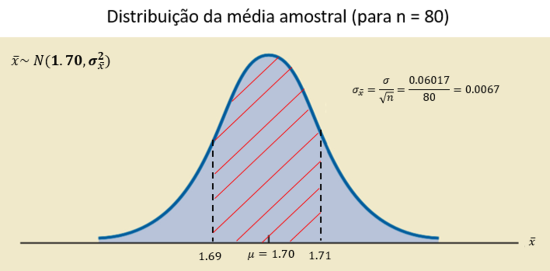

In [8]:
n = 80
x_barra_1 = 1.69
x_barra_2 = 1.71

E_media_amostral = dados_populacionais.mean()
σ = dados_populacionais.std(ddof=0)
sigma_x_barra = σ / np.sqrt(n)

area_2 = scipy.stats.norm.cdf(x=x_barra_2, loc=E_media_amostral, scale=sigma_x_barra) # Calcula a área abaixo de 1.71
area_1 = scipy.stats.norm.cdf(x=x_barra_1, loc=E_media_amostral, scale=sigma_x_barra) # Calcula a área abaixo de 1.69  
area = area_2 - area_1   # Calcula a área abaixo de 1.71 retirando-se a a área abaixo de 1.69 (resultando na área entre 1.69 e 1.71)  
area

array([0.8628318])

In [ ]:
'''
A probabilidade de que altura média das 80 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metros é de 86,28%.
'''

#### c) Repita a simulação do item a com amostras de tamanho 80.

In [9]:
# Gera 10 mil amostras diferentes de tamanho 80 
q = 10_000     # número de amostras diferentes a serem geradas
n = 80          # tamanho das amostras
amostras_80 = list()

while len(amostras_80) < q:
    amostra = set(np.random.choice(dados_populacionais.index, size=n, replace=False))
    if amostra not in amostras_80:
        amostras_80.append(amostra)

In [10]:
# Calcula a média para cada uma das 10 mil amostras que obtivemos de tamanho 80
medias_amostras_80 = list()
for amostra in amostras_80:
    alturas_amostra = dados_populacionais.loc[amostra]
    media_alturas = alturas_amostra.mean()
    medias_amostras_80.append(float(media_alturas))

In [11]:
# Calcula a porcentagem de amostras dentro do intervalo [1.69 e 1.71]

x_barra_1 = 1.69
x_barra_2 = 1.71

df_medias = pd.Series(medias_amostras_80) # Cria uma Serie com as 10 mil medias amostrais calculadas acima 
contagem = df_medias.between(left=x_barra_1, right=x_barra_2, inclusive='both').value_counts() # True: valores no intervalo [1.69 e 1.71]
print(f'Medias entre 1.69 e 1.71: {100*(contagem[True] / q)}%')

Medias entre 1.69 e 1.71: 86.41%


In [ ]:
'''
86.41% das 10 mil amostras geraram médias entre 1.69 e 1.71
Como esperávamos, um valor próximo de 86,28%.
'''